In [ ]:
#CARREGANDO DEPENDÊNCIAS#

#Instalando o Pytesseract e o tesseract-OCR
! sudo apt install tesseract-ocr 
! pip install pytesseract
! apt-get install tesseract-ocr-por
! tesseract --list-langs

#Importando bibliotecas
import numpy as np
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow # for image display
from skimage import io
import matplotlib.pylab as plt
import scipy
import pytesseract
import shutil
import os
import random
try:
 from PIL import Image
except ImportError:
 import Image



Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr-por is already the newest version (4.00~git24-0e00fe6-1.2).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
List of available languages (3):
por
osd
eng


In [ ]:
#Questão 1
#Desenvolva um código que lhe permita abrir uma imagem RGB ou BGR de sua preferência, utilizando a interface python do OpenCV. 
#Logo depois, converta a imagem para escala de cinza e exiba as duas imagens lado a lado na tela. Documente as funções utilizadas no código.

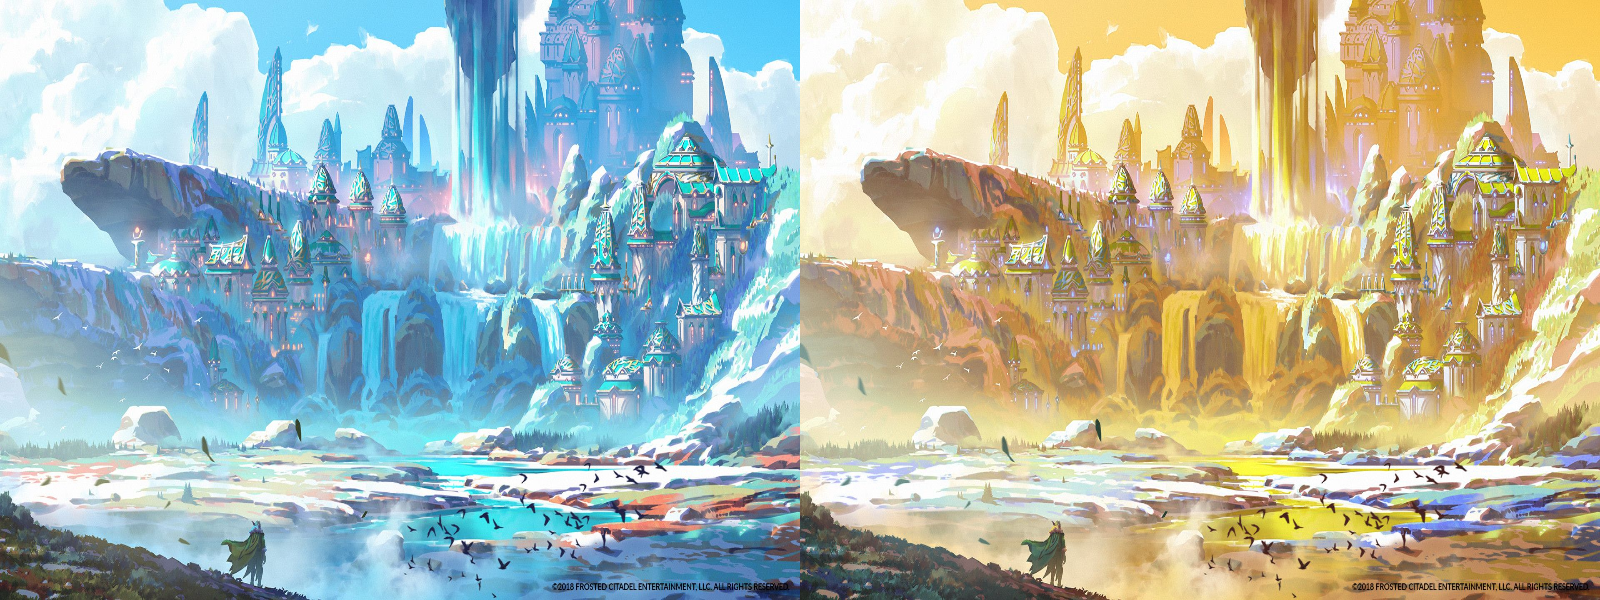

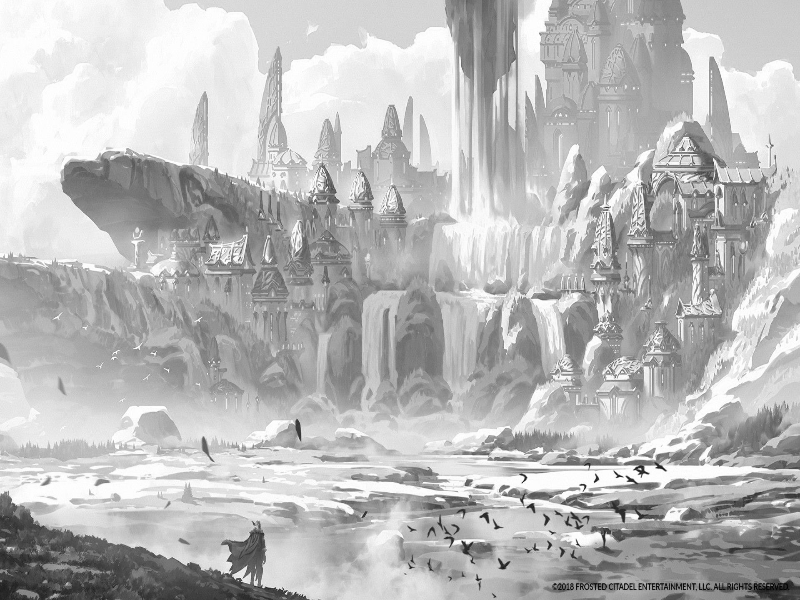

In [ ]:
#Criando a imagem a ser utilizada no exercicio (arquivo de imagem disponivel na pasta "images")
imagem = cv2.imread('/content/images/image2.jpeg')
#Redimensionando a imagem para 800x600
imagem = cv2.resize(imagem, (800, 600))
#Lendo a imagem em BGR e RGB
imagem2 = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
#Posicionando as imagens BGR e RGB lado a lado
imagem_final= cv2.hconcat((imagem, imagem2))
#Mostrando a imagem
cv2_imshow(imagem_final)
#Convertendo a imagem para escala de cinza
image_PB = cv2.cvtColor(imagem2, cv2.COLOR_BGR2GRAY)
#Mostrando a imagem em escala de cinza
cv2_imshow(image_PB)

In [ ]:
#Questão 2
#Utilizando o código fonte das nossas aulas como base, carregue uma imagem contendo pelo menos uma face (pode ser a imagem carregada no item 1), 
#depois carregue o modelo de detecção de faces utilizado nas nossas aulas anteriores. 
#Construa um código de detecção de faces, encontre a caixa envolvente da face na imagem. 
#Pinte o retângulo ao redor da(s) face(s) encontrada(s) e exiba a imagem pintada na tela. Documente as funções utilizadas no código.

In [ ]:
#Importando o classificador de face
detector_facial = cv2.CascadeClassifier('/content/cascades/haarcascade_frontalface_default.xml')

In [ ]:
#Importando a imagem utilizada para detecção de face
image_face = cv2.imread('/content/images/family_face.jpg')
#Convertendo a imagem para escala de cinza
image_gray = cv2.cvtColor(image_face, cv2.COLOR_BGR2GRAY)
#Definindo o detector de face e seus parametros
detector = detector_facial.detectMultiScale(image_gray, scaleFactor=1.1, minNeighbors=3,
                                             minSize=(32,32), maxSize=(100,100))
#Criando um for através do detector para desenhar as bbox e printar seu tamanho
for (x, y, w, h) in detector:
  print(w, h)
  cv2.rectangle(imagem, (x, y), (x + w, y + h), (0,255,0), 2)

#Mostrar a imagem final com as bbox
cv2_imshow(imagem)

In [ ]:
#Questão 3
#Carregue uma imagem que contenha uma página de texto de um documento digitalizado de sua preferência. 
#Uma vez carregada a imagem, utilize o OCR com o qual trabalhamos na nossa última aula (Tesseract), reconheça o texto, e imprima o texto reconhecido na tela.
#Documente as funções utilizadas no código.

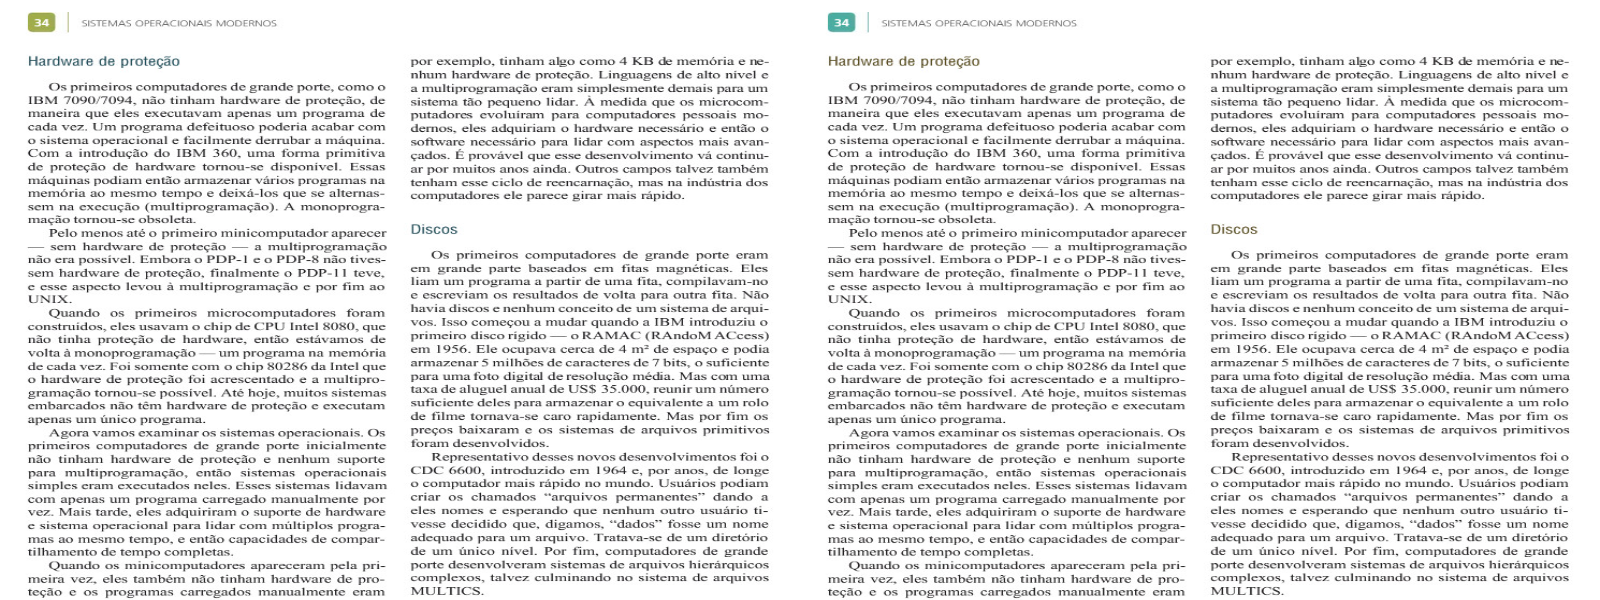

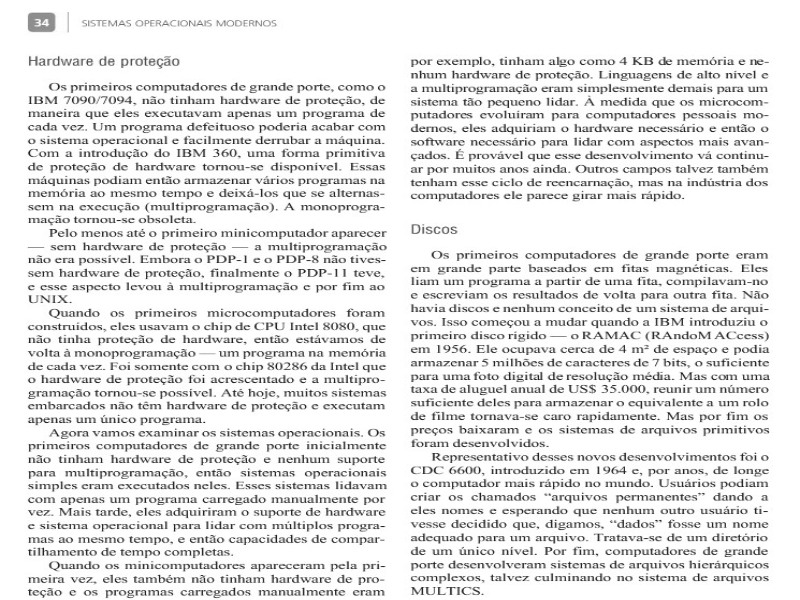

In [ ]:
#Criando um for para mostrar a imagem contendo um texto em BGR, RGB e escala de cinza
for url in urls:
  #Lendo a imagem contendo um texto
  image = io.imread('/content/images/ebook_sistemasoperacionais.jpg') 

  #Redimensionando a imagem para 800x600
  imagem = cv2.resize(image, (800, 600))
  
  #Convertendo a imagem para RGB
  image_2 = cv.cvtColor(imagem, cv.COLOR_BGR2RGB)
  
  #Definindo a imagem original e a imagem convertida lado a lado
  final_frame = cv.hconcat((imagem, image_2)) 

  #Mostrando as imagens lado a lado
  cv2_imshow(final_frame)

  #Convertendo a imagem para escala de cinza
  image_2_PB = cv.cvtColor( image_2, cv.COLOR_BGR2GRAY)
  
  #Mostrando a imagem em escala de cinza
  cv2_imshow(image_2_PB)

In [136]:
#Função para receber a imagem de entrada e extrair o texto em portugues
texto = pytesseract.image_to_string(image, lang='por')

#Printa o texto extraido
print(texto)

Hardware de proteção

Os primeiros computadores de grande porte, como o
IBM 7090/7094, não tinham hardware de proteção, de
maneira que eles executavam apenas um programa de
cada vez. Um programa defeituoso poderia acabar com
o sistema operacional e facilmente derrubar a máquina.

Com a introdução do IBM 360, uma forma primitiva
de proteção de hardware tornou-se disponivel. Essas
máquinas podiam então armazenar vários programas na
memória ao mesmo tempo e deixá-los que se altemas-

sem na execução (multiprogramação). A monoprogra-
mação tornou-se obsoleta.

Pelo menos até o primeiro minicomputador aparecer
— sem hardware de proteção — a multiprogramação
não era possível. Embora o PDP-1 e o PDP-8 não tives-
sem hardware de proteção, finalmente o PDP-11 teve,
e esse aspecto levou à multiprogramação e por fim ao
UNIX.

Quando os primeiros microcomputadores foram
construídos, eles usavam o chip de CPU Intel 8080, que
não tinha proteção de hardware, então estávamos de
volta à monoprogramação